In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pytz

pd.options.mode.chained_assignment = None  # default='warn'


%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


from sklearn import preprocessing
plt.rc("font", size=14)


In [3]:
show entire dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

SyntaxError: invalid syntax (<ipython-input-3-1927be38b009>, line 1)

In [3]:
hub_data = pd.read_csv("hub_actual.csv")


In [4]:
hub_data.head()

,settlement_point,interval_beginning_time_utc,price,interval_ending_time_utc,venue,market,product,type,status,uom,currency,source,provider,source_created_at,year,month
0,HB_BUSAVG,2021-10-18T01:00,43.01,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10
1,HB_HOUSTON,2021-10-18T01:00,43.25,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10
2,HB_HUBAVG,2021-10-18T01:00,42.62,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10
3,HB_NORTH,2021-10-18T01:00,43.49,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10
4,HB_PAN,2021-10-18T01:00,37.83,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10


In [5]:
hub_data['date_utc'] = pd.to_datetime(hub_data['interval_beginning_time_utc'])

In [6]:
hub_data['hour']=hub_data['date_utc'].dt.hour

In [31]:
hub_data['Day']=hub_data['date_utc'].dt.day

In [8]:
hub_data.head()

,settlement_point,interval_beginning_time_utc,price,interval_ending_time_utc,venue,market,product,type,status,uom,currency,source,provider,source_created_at,year,month,date_utc,hour,day
0,HB_BUSAVG,2021-10-18T01:00,43.01,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10,2021-10-18 01:00:00,1,18
1,HB_HOUSTON,2021-10-18T01:00,43.25,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10,2021-10-18 01:00:00,1,18
2,HB_HUBAVG,2021-10-18T01:00,42.62,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10,2021-10-18 01:00:00,1,18
3,HB_NORTH,2021-10-18T01:00,43.49,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10,2021-10-18 01:00:00,1,18
4,HB_PAN,2021-10-18T01:00,37.83,2021-10-18T02:00,ERCOT,DAY_AHEAD,ENERGY,SPP,F,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-17T19:00:18,2021,10,2021-10-18 01:00:00,1,18


In [9]:
AS_data = pd.read_csv("AS_actual.csv")

In [10]:
AS_data.head()

,date_utc,systemlambda,type,venue,market,product,settlement_point
0,2021-10-18T23:00,55.27,SPP,ERCOT,DAY_AHEAD,regup,system_level
1,2021-10-19T20:00,28.24,SPP,ERCOT,DAY_AHEAD,regup,system_level
2,2021-10-18T12:00,0.78,SPP,ERCOT,DAY_AHEAD,regdn,system_level
3,2021-10-18T23:00,57.27,SPP,ERCOT,DAY_AHEAD,regdn,system_level
4,2021-10-18T10:00,67.00,SPP,ERCOT,DAY_AHEAD,regup,system_level


In [11]:
AS_data['date_utc'] = pd.to_datetime(AS_data['date_utc'])
AS_data['hour']=AS_data['date_utc'].dt.hour
AS_data['day']=AS_data['date_utc'].dt.day

In [12]:
AS_data.head()

,date_utc,systemlambda,type,venue,market,product,settlement_point,hour,day
0,2021-10-18 23:00:00,55.27,SPP,ERCOT,DAY_AHEAD,regup,system_level,23,18
1,2021-10-19 20:00:00,28.24,SPP,ERCOT,DAY_AHEAD,regup,system_level,20,19
2,2021-10-18 12:00:00,0.78,SPP,ERCOT,DAY_AHEAD,regdn,system_level,12,18
3,2021-10-18 23:00:00,57.27,SPP,ERCOT,DAY_AHEAD,regdn,system_level,23,18
4,2021-10-18 10:00:00,67.00,SPP,ERCOT,DAY_AHEAD,regup,system_level,10,18


In [14]:
AS_data_uplan = pd.read_csv("Oct_19_AS_Uplan_csv.csv")

In [15]:
AS_data_uplan.head()

,A/S Zone Name,Market,Day,Hour,Price ($/MWh),Peak/Off-Peak,Date/Time,Scenario Name
0,ERCOT,NON-SPIN,19,1,11.51,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
1,ERCOT,REGULATION DOWN,19,1,11.55,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
2,ERCOT,REGULATION UP,19,1,9.41,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
3,ERCOT,SPIN,19,1,7.22,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
4,ERCOT,NON-SPIN,19,2,19.02,Off Peak,10/19/2021 1:00,LCG Forecast_2021-10-19


In [16]:
AS_data_uplan['date_utc'] = pd.to_datetime(AS_data_uplan['Date/Time'])

In [17]:
hub_data_uplan = pd.read_csv("Oct_19_Hub_Uplan_csv.csv")

In [18]:
hub_data_uplan.head()

,Hub Name,Day,Hour,LMP ($/MWh),LMP Energy ($/MWh),LMP Congestion ($/MWh),Peak/Off-Peak,Date/Time,Scenario Name
0,HB_HOUSTON,19,1,28.64,26.14,2.50,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
1,HB_NORTH,19,1,23.33,26.14,-2.81,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
2,HB_PAN,19,1,17.84,26.14,-8.30,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
3,HB_SOUTH,19,1,33.24,26.14,7.10,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19
4,HB_WEST,19,1,15.76,26.14,-10.38,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19


In [20]:
hub_data_uplan['date_utc'] = pd.to_datetime(hub_data_uplan['Date/Time'])

In [41]:
hub_data_uplan.shape

(120, 10)

In [38]:
merged_hub = pd.merge(hub_data_uplan,hub_data, on=['date_utc'])

In [42]:
hub_data_uplan.to_csv("hub_uplan_py.csv", index=True)
hub_data.to_csv("hub_actual_py.csv", index=True)


In [43]:
AS_data_uplan.to_csv("AS_uplan_py.csv", index=True)
AS_data.to_csv("AS_actual_py.csv", index=True)


In [40]:
merged_hub.shape

(875, 29)

In [34]:
#check one Hub_houston

merge_filter=merged_hub[(merged_hub['Day']==19) & (merged_hub['Hub Name']=='HB_HOUSTON') ]



In [37]:
merge_filter

,Hub Name,Day,Hour,LMP ($/MWh),LMP Energy ($/MWh),LMP Congestion ($/MWh),Peak/Off-Peak,Date/Time,Scenario Name,date_utc_x,...,uom,currency,source,provider,source_created_at,year,month,date_utc_y,hour,day
0,HB_HOUSTON,19,1,28.64,26.14,2.50,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19,2021-10-19 00:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-19T19:00:16,2021,10,2021-10-19 23:00:00,23,19
1,HB_HOUSTON,19,1,28.64,26.14,2.50,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19,2021-10-19 00:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-19T19:00:16,2021,10,2021-10-19 23:00:00,23,19
2,HB_HOUSTON,19,1,28.64,26.14,2.50,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19,2021-10-19 00:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-19T19:00:16,2021,10,2021-10-19 23:00:00,23,19
3,HB_HOUSTON,19,1,28.64,26.14,2.50,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19,2021-10-19 00:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-19T19:00:16,2021,10,2021-10-19 23:00:00,23,19
4,HB_HOUSTON,19,1,28.64,26.14,2.50,Off Peak,10/19/2021 0:00,LCG Forecast_2021-10-19,2021-10-19 00:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-19T19:00:16,2021,10,2021-10-19 23:00:00,23,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,HB_HOUSTON,19,24,39.85,38.76,1.09,Off Peak,10/19/2021 23:00,LCG Forecast_2021-10-19,2021-10-19 23:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-18T19:00:49,2021,10,2021-10-19 23:00:00,23,19
20296,HB_HOUSTON,19,24,39.85,38.76,1.09,Off Peak,10/19/2021 23:00,LCG Forecast_2021-10-19,2021-10-19 23:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-18T19:00:49,2021,10,2021-10-19 23:00:00,23,19
20297,HB_HOUSTON,19,24,39.85,38.76,1.09,Off Peak,10/19/2021 23:00,LCG Forecast_2021-10-19,2021-10-19 23:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-18T19:00:49,2021,10,2021-10-19 23:00:00,23,19
20298,HB_HOUSTON,19,24,39.85,38.76,1.09,Off Peak,10/19/2021 23:00,LCG Forecast_2021-10-19,2021-10-19 23:00:00,...,MWh,USD,ERCOT,ZEMA_ERCOT_NODAL_DAM_SPPS,2021-10-18T19:00:49,2021,10,2021-10-19 23:00:00,23,19


No handles with labels found to put in legend.


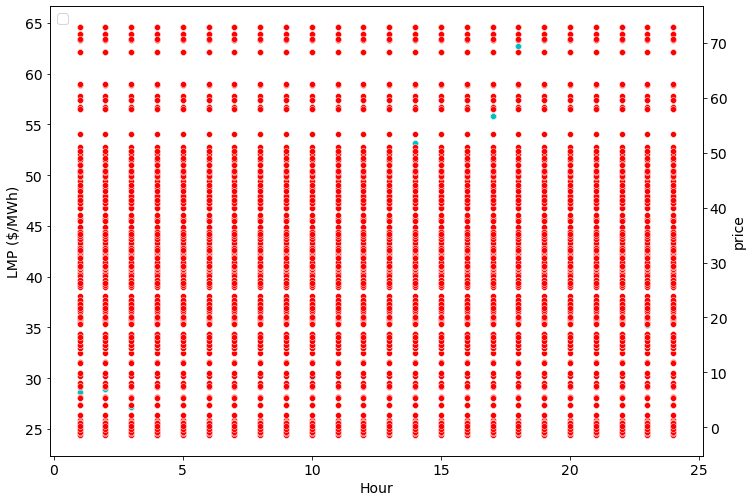

In [36]:
sns.scatterplot(data=merge_filter, x="Hour",y="LMP ($/MWh)",color="c", ci=None)
ax2 = plt.twinx()
sns.scatterplot(data=merge_filter, x="Hour",y="price",ax=ax2,color="r", ci=None)
plt.gcf().set_size_inches(11.7, 8.27)
plt.legend(loc="upper left")

In [44]:
hub_data_rt = pd.read_csv("hb_houston_rt.csv")

In [45]:
hub_data_rt['date_utc'] = pd.to_datetime(hub_data_rt['date_utc'])

In [49]:
hub_data_rt['hour']=hub_data['date_utc'].dt.hour
hub_data_rt['day']=hub_data['date_utc'].dt.day


In [50]:
hub_data_rt['min']=hub_data['date_utc'].dt.minute

In [53]:
hub_data_rt.tail()

,date_utc,systemlambda,type,venue,market,product,settlement_point,hour,day,min
1086,2021-10-20 19:10:00,74.97,LMP,ERCOT,REAL_TIME,energy,hb_houston,NaN,NaN,NaN
1087,2021-10-20 19:15:00,74.97,LMP,ERCOT,REAL_TIME,energy,hb_houston,NaN,NaN,NaN
1088,2021-10-20 19:20:00,75.03,LMP,ERCOT,REAL_TIME,energy,hb_houston,NaN,NaN,NaN
1089,2021-10-20 19:25:00,75.03,LMP,ERCOT,REAL_TIME,energy,hb_houston,NaN,NaN,NaN
1090,2021-10-20 19:28:00,75.04,LMP,ERCOT,REAL_TIME,energy,hb_houston,NaN,NaN,NaN


In [52]:
hub_data_rt.to_csv("hub_actual_rt.csv", index=True)

In [4]:
#read actual data
dam_actual = pd.read_csv("dam_lmp_20210901.csv")
as_actual=pd.read_csv("mcpc_20210901.csv")
rtm_actual=pd.read_csv("rtm_lmp_20210901.csv")                      

In [5]:
#read Uplan data
hb_uplan = pd.read_csv("HB_sep1_LCG.csv")
as_uplan=pd.read_csv("AS_sep1_LCG.csv")

In [11]:
as_actual.head()

,timestamp,NSPIN,REGDN,REGUP,RRS,date
0,2021-09-01 00:00:00-05:00,4.0,8.0,3.0,3.00,2021-09-01 00:00:00-05:00
1,2021-09-01 01:00:00-05:00,4.0,6.0,2.5,2.50,2021-09-01 01:00:00-05:00
2,2021-09-01 02:00:00-05:00,4.0,5.0,2.6,2.40,2021-09-01 02:00:00-05:00
3,2021-09-01 03:00:00-05:00,4.0,6.0,3.0,2.61,2021-09-01 03:00:00-05:00
4,2021-09-01 04:00:00-05:00,4.0,6.0,3.9,3.00,2021-09-01 04:00:00-05:00


In [10]:
as_uplan.head()

,Date/Time,Year,Month,Day,Hour,Market,Price ($/MWh),Scenario Name,date
0,9/1/2021 0:00,2021,9,1,1,NON-SPIN,23.73,AUG Forecast_2021-09-01,2021-09-01 00:00:00
1,9/1/2021 0:00,2021,9,1,1,REGULATION DOWN,2.65,AUG Forecast_2021-09-01,2021-09-01 00:00:00
2,9/1/2021 0:00,2021,9,1,1,REGULATION UP,12.10,AUG Forecast_2021-09-01,2021-09-01 00:00:00
3,9/1/2021 0:00,2021,9,1,1,SPIN,12.51,AUG Forecast_2021-09-01,2021-09-01 00:00:00
4,9/1/2021 1:00,2021,9,1,2,NON-SPIN,24.03,AUG Forecast_2021-09-01,2021-09-01 01:00:00


In [21]:
#convert dates of both actual and uplan to datetime
as_uplan['date'] = pd.to_datetime(as_uplan['Date/Time'])
as_actual['date'] = pd.to_datetime(as_actual['timestamp'])
as_actual['date']=as_actual['date'].astype('datetime64[ns]')

In [24]:
merge_as=pd.merge(as_uplan,as_actual, on=['date'])


In [23]:
as_actual.dtypes

timestamp            object
NSPIN               float64
REGDN               float64
REGUP               float64
RRS                 float64
date         datetime64[ns]
dtype: object

In [25]:
merge_as.head()

,Date/Time,Year,Month,Day,Hour,Market,Price ($/MWh),Scenario Name,date,timestamp,NSPIN,REGDN,REGUP,RRS
0,9/1/2021 5:00,2021,9,1,6,NON-SPIN,23.93,AUG Forecast_2021-09-01,2021-09-01 05:00:00,2021-09-01 00:00:00-05:00,4.0,8.0,3.0,3.0
1,9/1/2021 5:00,2021,9,1,6,REGULATION DOWN,0.73,AUG Forecast_2021-09-01,2021-09-01 05:00:00,2021-09-01 00:00:00-05:00,4.0,8.0,3.0,3.0
2,9/1/2021 5:00,2021,9,1,6,REGULATION UP,8.22,AUG Forecast_2021-09-01,2021-09-01 05:00:00,2021-09-01 00:00:00-05:00,4.0,8.0,3.0,3.0
3,9/1/2021 5:00,2021,9,1,6,SPIN,8.50,AUG Forecast_2021-09-01,2021-09-01 05:00:00,2021-09-01 00:00:00-05:00,4.0,8.0,3.0,3.0
4,9/1/2021 6:00,2021,9,1,7,NON-SPIN,23.73,AUG Forecast_2021-09-01,2021-09-01 06:00:00,2021-09-01 01:00:00-05:00,4.0,6.0,2.5,2.5


In [26]:
dam_input = pd.read_csv("dam_compare.csv")

In [27]:
dam_input.head()

,time,variable,value,Hour,UPLAN_LCG,UPLAN_LCG.1,UPLAN_GM,UPLAN_GM_diff
0,9/1/2021 0:00,LZ_CPS,27.57,1,26.296,1.274,24.358,3.212
1,9/1/2021 1:00,LZ_CPS,25.29,2,25.396,0.106,25.286,0.004
2,9/1/2021 2:00,LZ_CPS,23.22,3,24.994,1.774,25.698,2.478
3,9/1/2021 3:00,LZ_CPS,22.24,4,24.968,2.728,25.363,3.123
4,9/1/2021 4:00,LZ_CPS,22.88,5,25.146,2.266,25.364,2.484


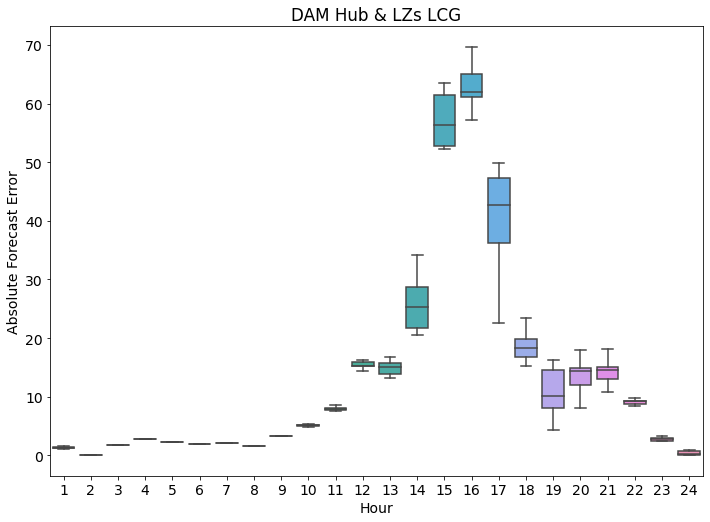

In [56]:
sns.boxplot(data=dam_input, x="Hour",y="UPLAN_LCG.1", showfliers =False)
plt.ylabel('Absolute Forecast Error')
plt.title('DAM Hub & LZs LCG')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('DAM_HB_LCG.png', dpi=300, bbox_inches='tight')

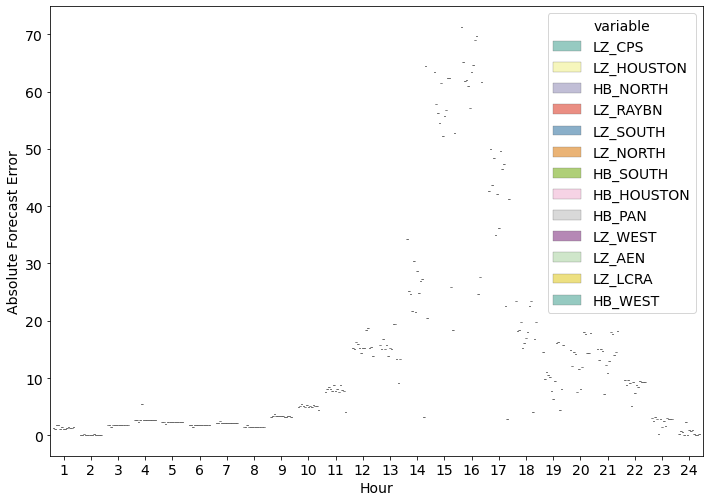

In [36]:
sns.boxplot(data=dam_input, x="Hour",y="UPLAN_LCG.1",hue='variable', palette="Set3",linewidth=0.5)
plt.ylabel('Absolute Forecast Error')
plt.gcf().set_size_inches(11.7, 8.27)

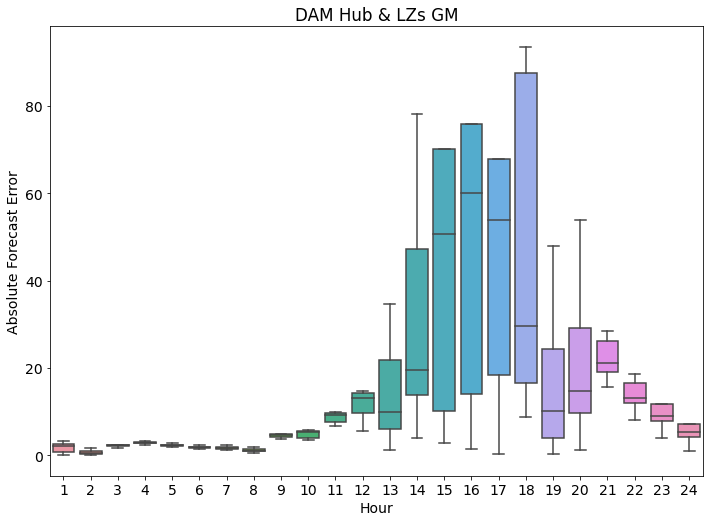

In [57]:
sns.boxplot(data=dam_input, x="Hour",y="UPLAN_GM_diff",showfliers =False)
plt.ylabel('Absolute Forecast Error')
plt.title('DAM Hub & LZs GM')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('DAM_HB_GM.png', dpi=300, bbox_inches='tight')

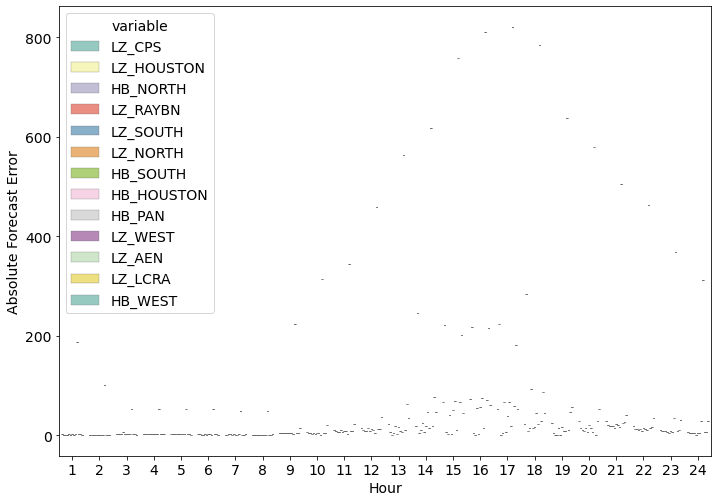

In [37]:
sns.boxplot(data=dam_input, x="Hour",y="UPLAN_GM_diff",hue='variable', palette="Set3",linewidth=0.5)
plt.ylabel('Absolute Forecast Error')
plt.gcf().set_size_inches(11.7, 8.27)

In [40]:
rtm_input = pd.read_csv("rtm_compare.csv")

In [41]:
rtm_input.head()

,time,variable,Hour,value,UPLAN_LCG,diff
0,9/1/2021 0:00,LZ_LCRA,1,26.5125,28.17,1.6575
1,9/1/2021 1:00,LZ_LCRA,2,24.6900,25.59,0.9000
2,9/1/2021 2:00,LZ_LCRA,3,22.9575,24.67,1.7125
3,9/1/2021 3:00,LZ_LCRA,4,23.0300,24.28,1.2500
4,9/1/2021 4:00,LZ_LCRA,5,24.5100,25.18,0.6700


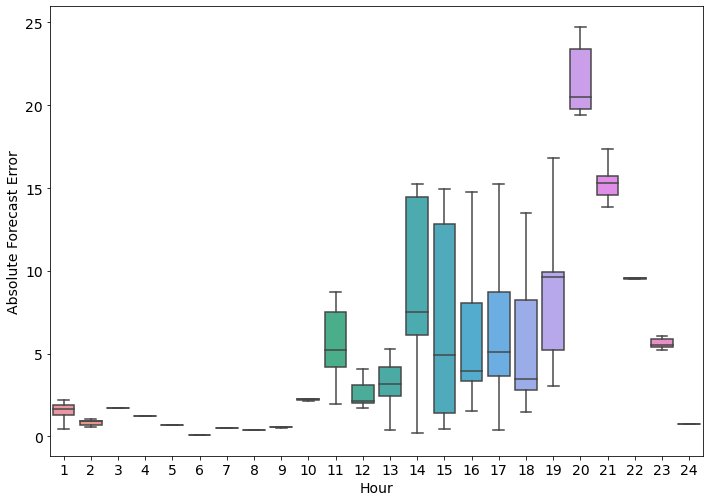

In [44]:
sns.boxplot(data=rtm_input, x="Hour",y="diff",showfliers =False)
plt.ylabel('Absolute Forecast Error')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('RTM_HB_LCG.png', dpi=300, bbox_inches='tight')

In [45]:
dam_input_all = pd.read_csv("dam_compare_all.csv")

In [46]:
dam_input_all.head()

,time,variable,value,Hour,UPLAN_LCG,UPLAN_LCG.1,UPLAN_GM,UPLAN_GM_diff
0,9/1/2021 0:00,HWF_HWFG1,27.73,1,26.30,1.43,28.89,1.16
1,9/1/2021 1:00,HWF_HWFG1,25.29,2,25.40,0.11,26.56,1.27
2,9/1/2021 2:00,HWF_HWFG1,23.22,3,24.99,1.77,25.20,1.98
3,9/1/2021 3:00,HWF_HWFG1,22.24,4,24.97,2.73,24.87,2.63
4,9/1/2021 4:00,HWF_HWFG1,22.88,5,25.15,2.27,24.87,1.99


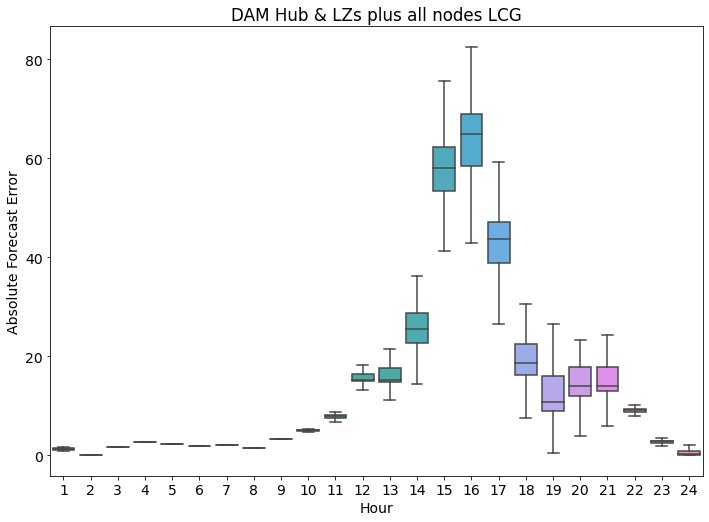

In [69]:
sns.boxplot(data=dam_input_all, x="Hour",y="UPLAN_LCG.1", showfliers =False )
plt.ylabel('Absolute Forecast Error')
plt.title('DAM Hub & LZs plus all nodes LCG')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('DAM_all_LCG.png', dpi=300, bbox_inches='tight')

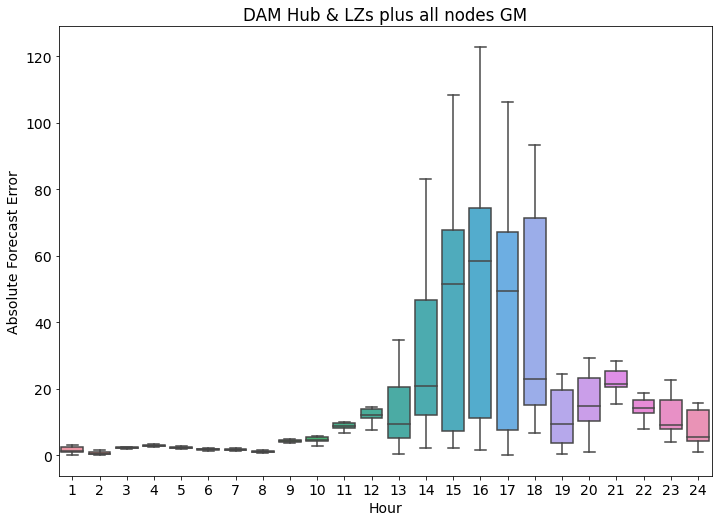

In [70]:
sns.boxplot(data=dam_input_all, x="Hour",y="UPLAN_GM_diff", showfliers =False )
plt.ylabel('Absolute Forecast Error')
plt.title('DAM Hub & LZs plus all nodes GM')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('DAM_all_GM.png', dpi=300, bbox_inches='tight')

In [51]:
rtm_input_all = pd.read_csv("rtm_compare_all.csv")

In [52]:
rtm_input_all.head()

,variable,Hour plus one,value,UPLAN_LCG,diff,UPLAN_GM,diff.1
0,BRA_AVR_CST1,1,26.5125,27.45,0.9375,23.69,2.8225
1,BRA_AVR_CST1,2,24.6875,25.92,1.2325,23.78,0.9075
2,BRA_AVR_CST1,3,22.9575,24.57,1.6125,23.98,1.0225
3,BRA_AVR_CST1,4,23.0300,24.57,1.5400,24.32,1.2900
4,BRA_AVR_CST1,5,24.5100,24.99,0.4800,24.03,0.4800


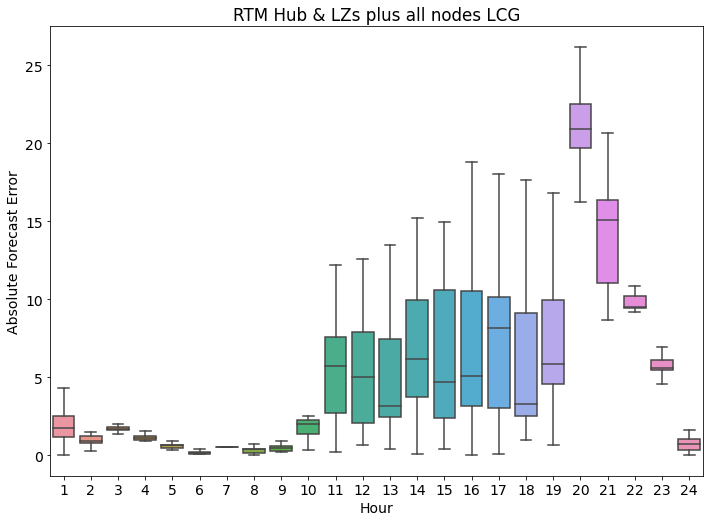

In [71]:
sns.boxplot(data=rtm_input_all, x="Hour plus one",y="diff", showfliers =False )
plt.ylabel('Absolute Forecast Error')
plt.title('RTM Hub & LZs plus all nodes LCG')
plt.xlabel('Hour')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('RTM_all_LCG.png', dpi=300, bbox_inches='tight')

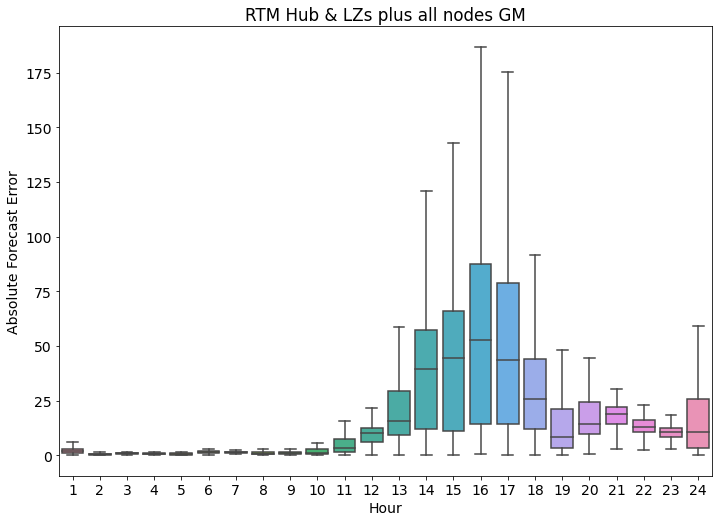

In [72]:
sns.boxplot(data=rtm_input_all, x="Hour plus one",y="diff.1", showfliers =False )
plt.ylabel('Absolute Forecast Error')
plt.title('RTM Hub & LZs plus all nodes GM')
plt.xlabel('Hour')
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig('RTM_all_GM.png', dpi=300, bbox_inches='tight')

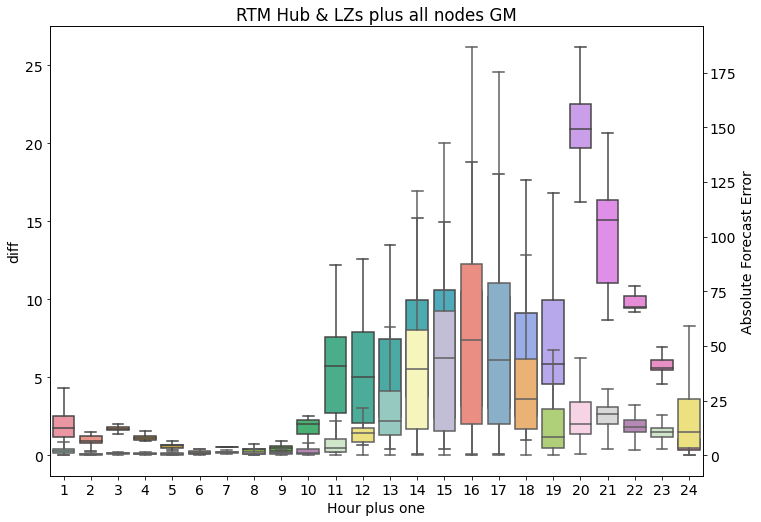

In [76]:
sns.boxplot(data=rtm_input_all, x="Hour plus one",y="diff", showfliers =False )
ax2 = plt.twinx()
sns.boxplot(data=rtm_input_all, x="Hour plus one",y="diff.1",showfliers =False,palette="Set3")
plt.ylabel('Absolute Forecast Error')
plt.title('RTM Hub & LZs plus all nodes GM')
plt.xlabel('Hour')
plt.gcf().set_size_inches(11.7, 8.27)
#plt.savefig('RTM_all_GM.png', dpi=300, bbox_inches='tight')


## read actual generation data

In [77]:
gen_input = pd.read_csv("60d_DAM_Gen_Resource_Data-31-OCT-21.csv")

In [78]:
gen_input.head()

,Delivery Date,Hour Ending,QSE,DME,Resource Name,Resource Type,QSE submitted Curve-MW1,QSE submitted Curve-Price1,QSE submitted Curve-MW2,QSE submitted Curve-Price2,...,Settlement Point Name,Energy Settlement Point Price,RegUp Awarded,RegUp MCPC,RegDown Awarded,RegDown MCPC,RRS Awarded,RRS MCPC,NonSpin Awarded,NonSpin MCPC
0,09/01/2021,1,QGOLDN,YGOLDE,AEEC_ANTLP_1,DSL,30.0,44.94,32.7,45.47,...,AEEC,27.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/01/2021,1,QGOLDN,YGOLDE,AEEC_ANTLP_2,DSL,NaN,NaN,NaN,NaN,...,AEEC,27.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/01/2021,1,QGOLDN,YGOLDE,AEEC_ANTLP_3,DSL,30.0,44.94,32.7,45.47,...,AEEC,27.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/01/2021,1,QGOLDN,YGOLDE,AEEC_ELK_1,SCGT90,85.0,34.47,97.2,35.68,...,AEEC,27.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/01/2021,1,QGOLDN,YGOLDE,AEEC_ELK_2,SCGT90,85.0,38.86,97.2,40.23,...,AEEC,27.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
gen_input_wind=gen_input[gen_input['Resource Type']=='WIND']
gen_input_solar=gen_input[gen_input['Resource Type']=='PVGRD']

In [82]:
df=gen_input_wind[['Delivery Date','Hour Ending','Resource Name','HSL']]

In [83]:
df2=df.pivot(index='Hour Ending', columns='Resource Name', values='HSL')


In [84]:
df2.head()

Resource Name,AJAXWIND_UNIT1,AJAXWIND_UNIT2,AMADEUS1_UNIT1,AMADEUS1_UNIT2,AMADEUS2_UNIT3,ANACACHO_ANA,ASTRA_UNIT1,AVIATOR_UNIT1,AVIATOR_UNIT2,BAFFIN_UNIT1,...,WH_WIND_UNIT2,WILDWIND_UNIT1,WILDWIND_UNIT2,WILDWIND_UNIT3,WILDWIND_UNIT4,WILDWIND_UNIT5,WL_RANCH_UNIT1,WNDTHST2_UNIT1,WOODWRD1_WOODWRD1,WOODWRD2_WOODWRD2
Hour Ending,,,,,,,,,,,,,,,,,,,,,
1,80.0,50.9,8.9,8.2,54.4,77.3,76.5,77.8,57.6,25.8,...,56.9,8.4,16.4,2.1,20.6,8.2,116.0,24.0,26.6,21.6
2,82.6,51.9,8.1,7.2,48.1,65.7,75.7,85.6,61.6,23.0,...,57.3,8.1,15.3,2.1,19.8,8.0,119.8,25.8,29.8,24.8
3,79.5,49.5,7.2,6.3,45.0,54.8,78.3,91.4,64.6,19.3,...,62.2,7.6,14.1,1.9,18.8,7.3,122.8,26.4,29.6,26.4
4,69.7,43.0,7.9,6.8,48.2,46.0,79.4,89.1,62.8,16.3,...,64.7,7.1,13.1,1.8,17.7,6.8,126.7,24.0,29.3,27.7
5,57.4,35.5,10.9,7.6,41.5,40.2,78.8,87.0,59.3,13.2,...,64.6,6.6,12.4,1.7,16.7,6.3,121.2,19.1,27.9,27.4


In [85]:
df2.to_csv('gen_proiles.csv', index=True)

In [90]:
gen_input_wind_solar=gen_input[(gen_input['Resource Type']=='WIND') | (gen_input['Resource Type']=='PVGR')]

In [91]:
gen_input_wind_solar.tail()

,Delivery Date,Hour Ending,QSE,DME,Resource Name,Resource Type,QSE submitted Curve-MW1,QSE submitted Curve-Price1,QSE submitted Curve-MW2,QSE submitted Curve-Price2,...,Settlement Point Name,Energy Settlement Point Price,RegUp Awarded,RegUp MCPC,RegDown Awarded,RegDown MCPC,RRS Awarded,RRS MCPC,NonSpin Awarded,NonSpin MCPC
24638,09/01/2021,24,QSUE10,YSUEZ,WL_RANCH_UNIT1,WIND,NaN,NaN,NaN,NaN,...,WL_RANCH_RN,28.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24639,09/01/2021,24,QTENSK,YWTHOR,WNDTHST2_UNIT1,WIND,NaN,NaN,NaN,NaN,...,WNDTS2_UNIT1,28.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24642,09/01/2021,24,QFPL10,YLUMN,WOODWRD1_WOODWRD1,WIND,NaN,NaN,NaN,NaN,...,WOODWRD1_RN,29.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24643,09/01/2021,24,QFPL10,YLUMN,WOODWRD2_WOODWRD2,WIND,NaN,NaN,NaN,NaN,...,WOODWRD2_RN,29.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24646,09/01/2021,24,QECNR,YEONCR,W_PECOS_UNIT1,PVGR,NaN,NaN,NaN,NaN,...,W_PECO_UNIT1,28.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df=gen_input_wind_solar[['Delivery Date','Hour Ending','Resource Name','HSL']]

In [94]:
df2=df.pivot(index='Hour Ending', columns='Resource Name', values='HSL')


In [95]:
df2.to_csv('gen_proiles_all.csv', index=True)